In [46]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
path = 'C:/Users/User/Downloads/titanic/train.csv'
df = pd.read_csv(path)
df.shape

(891, 12)

1. 컬럼명, 인덱스 명 확인 - Embark 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)
1. 누락 처리 - Cabin (짐 맡긴 곳) 이 누락이 너무 많습니다.
1. 필요없는 데이터 제거 - 이름과 티켓 번호 
1. 카테고리 데이터 확인 - Pclass 는 수치가 아니라 카테고리 입니다.

In [60]:
df.sort_values(by='Fare', ascending=False,)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.00,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.00,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C


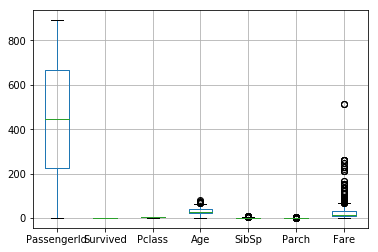

In [57]:
df.boxplot()

In [48]:
df0 = df.set_index('PassengerId')

In [49]:
df2 = df1.dropna(axis=0)

In [50]:
df3 = df2.drop(columns=['Name','Ticket'])

In [ ]:
df3.Sex.unique()

In [52]:
df3['Sex'] = df3['Sex'].map({'male':0, 'female':1})

In [53]:
df3.Pclass = df3.Pclass.values.astype(np.str) # .values 넘파이 배열 

In [63]:
df_hot = pd.get_dummies(df3) # 원핫 인코딩

In [79]:
x = df_hot.drop(columns='Survived')
y = df_hot['Survived']
x.shape, y.shape, y.mean(), type(x), type(y)

((712, 11),
 (712,),
 0.4044943820224719,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [ ]:
from sklearn.linear_model import LogisticRegression #sklearn 으로 학습시켜 봅니다
model = LogisticRegression().fit(x,y)
model.score(x, y)

In [97]:
x = np.array(x) #원래는 x.values 로 배열로 변환합니다
y = np.array(y).reshape([-1, 1])
x.shape, y.shape

((712, 11), (712, 1))

In [102]:
from sklearn.preprocessing import StandardScaler # 표준편차 정규화 : 이상치가 많을 때 효과적 

In [107]:
scaler = StandardScaler().fit(x) # 평균, 표준편차 저장
x_n = scaler.transform(x) # 정규화 (X - x_min) / x_std
x_n.min(), x_n.max()

(-2.0177168880827967, 9.031167698718745)

연산할때 주의할 점 :  a / (b + 0.00000001) ,  log(x + 0.00000001), log(0) = -inf

In [124]:
X = tf.placeholder(tf.float32, [None, 11])
Y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal(shape=[11, 1], seed=1)) # X(n, 8)  W (?, ?) >  (n, 1)
b = tf.Variable(0.0)
h = tf.sigmoid(tf.matmul(X, W) + b)
h = tf.maximum(1e-8, h)  # 0.0000000001  : 0이 총 8개 
cost = - tf.reduce_mean(  (Y * tf.log(h) + (1-Y) * tf.log(1-h)  )  )  #Cross Entropy 
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_list = [] 

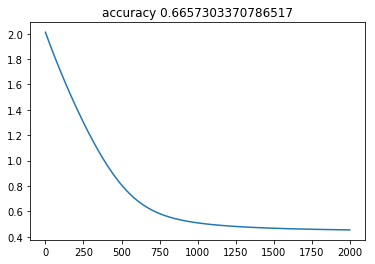

In [126]:
from sklearn.metrics import accuracy_score
for i in range(1000):
    _, _cost = sess.run([train, cost], {X:x_n, Y:y})
    cost_list.append(_cost)
acc = accuracy_score(y, np.round( sess.run(h, {X:x} )))
plt.title('accuracy ' + str(acc))
p = plt.plot(cost_list)